In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 데이터 살펴보기

## (1) title_basics
- tconst (string) : 제목의 알파벳과 숫자로 이루어진 고유식별자
- titleType (string) : 형식 또는 유형 (ex. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) : 더 인기 있는 제목 또는 공식적인 발매 시점에서 제작자가 사용한 제목
- originalTitle (string) : 원래 언어로 작성된 제목
- isAdult (boolean) : 0 -> non-adult title / 1-> adult title
- startYear (YYYY) : 발매 연도
- endYear (YYYY) : TV 시리즈의 종료 연도. 다른 제목 유형의 경우‘\N'
- runtimeMinutes : 상영 시간, 분 단위
- genres (string array) : 최대 세 가지 장르를 포함한 문자열 배열
- ### end Year 삭제 필요

In [2]:
title_basics = pd.read_csv('txt/title.basics.txt', sep='\t')

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3526: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10246260,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10246261,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10246262,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10246263,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [4]:
# endYear 삭제
title_basics.drop(["endYear"],axis=1,inplace=True)
title_basics.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"


In [5]:
title_basics.titleType.value_counts()

tvEpisode       7812135
short            957205
movie            660202
video            281665
tvSeries         250824
tvMovie          143236
tvMiniSeries      50844
tvSpecial         43878
videoGame         36234
tvShort           10041
tvPilot               1
Name: titleType, dtype: int64

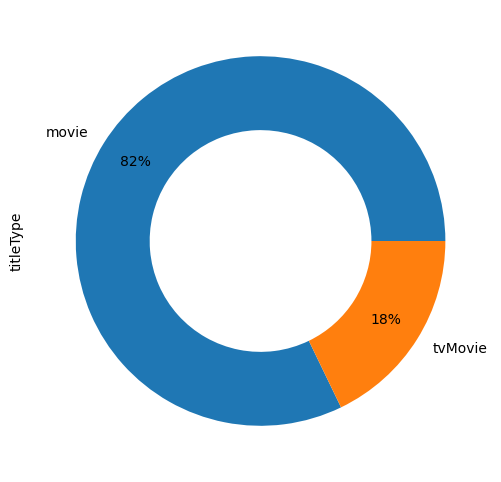

In [6]:
title_basics = title_basics[(title_basics.titleType == "movie") | (title_basics.titleType == "tvMovie")]
title_basics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8, wedgeprops=dict(width=0.4))
plt.show()

In [7]:
title_basics.genres.value_counts()

Drama                            146190
Documentary                      134744
\N                                85515
Comedy                            62490
Horror                            17594
                                  ...  
Sci-Fi,Thriller,Western               1
Action,Comedy,Talk-Show               1
Fantasy,Romance,Sport                 1
Documentary,Game-Show,History         1
Biography,Fantasy,Musical             1
Name: genres, Length: 1530, dtype: int64

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Sample data
temp = ["action|adventure|sci-fi", "romance|drama", "action|crime|thriller"]

# Creating CountVectorizer
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)

# Transforming the data
bag_of_genres = vec.transform(temp)

# Getting feature names
unique_genres = vec.get_feature_names_out()
np.array(unique_genres)

array(['action', 'adventure', 'crime', 'drama', 'romance', 'sci-fi',
       'thriller'], dtype=object)

In [9]:
# genres_num 만들기
title_basics['genres_num'] = title_basics.genres.apply(lambda x: len(x.split(',')))
title_basics.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\2523255775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_basics['genres_num'] = title_basics.genres.apply(lambda x: len(x.split(',')))


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genres_num
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",3
498,tt0000502,movie,Bohemios,Bohemios,0,1905,100,\N,1
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",3
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama,1


In [10]:
title_basics['genres_num'].max()

3

In [11]:
# genres_first 만들기
title_basics['genres_first'] = title_basics.genres.apply(lambda x: x.split(',')[0] if ',' in x else x)
title_basics.head(2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\1473665015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_basics['genres_first'] = title_basics.genres.apply(lambda x: x.split(',')[0] if ',' in x else x)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genres_num,genres_first
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",3,Documentary


In [12]:
# genres_first 열의 고유한 값들을 가져옵니다.
unique_genres = title_basics['genres_first'].unique()

# 각 장르에 대한 정수 레이블을 만듭니다.
genre_to_int = {genre: i for i, genre in enumerate(unique_genres)}

# genres_first 열을 정수로 매핑합니다.
title_basics['genres_first_encoded'] = title_basics['genres_first'].map(genre_to_int)
title_basics.head(2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\1662708313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_basics['genres_first_encoded'] = title_basics['genres_first'].map(genre_to_int)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genres_num,genres_first,genres_first_encoded
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance,0
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",3,Documentary,1


In [13]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803438 entries, 8 to 10246215
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   tconst                803438 non-null  object
 1   titleType             803438 non-null  object
 2   primaryTitle          803438 non-null  object
 3   originalTitle         803438 non-null  object
 4   isAdult               803438 non-null  object
 5   startYear             803438 non-null  object
 6   runtimeMinutes        803438 non-null  object
 7   genres                803438 non-null  object
 8   genres_num            803438 non-null  int64 
 9   genres_first          803438 non-null  object
 10  genres_first_encoded  803438 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 73.6+ MB


## (2) title_crew
- tconst (string) :  제목의 알파벳과 숫자로 이루어진 고유식별자
- directors (array of nconsts) : 감독(들)을 나타내는 고유식별자
- writers (array of nconsts) : 작가(들)를 나타내는 고유식별자 배열

In [14]:
title_crew = pd.read_csv('txt/title.crew.txt', sep='\t')

In [15]:
# 너무 오래 걸려서 movie랑 tv_movie만 남기기
title_crew = pd.merge(title_basics, title_crew, on="tconst")
title_crew

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genres_num,genres_first,genres_first_encoded,directors,writers
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance,0,nm0085156,nm0085156
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",3,Documentary,1,nm0714557,\N
2,tt0000502,movie,Bohemios,Bohemios,0,1905,100,\N,1,\N,2,nm0063413,"nm0063413,nm0657268,nm0675388"
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",3,Action,3,nm0846879,nm0846879
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama,1,Drama,4,nm0141150,nm0141150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803433,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary,1,Documentary,1,nm0652213,"nm0652213,nm10538576"
803434,tt9916692,tvMovie,Teatroteka: Czlowiek bez twarzy,Teatroteka: Czlowiek bez twarzy,0,2015,66,Drama,1,Drama,4,nm10538592,nm10538592
803435,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,Comedy,1,Comedy,6,nm7764440,nm7933903
803436,tt9916730,movie,6 Gunn,6 Gunn,0,2017,116,Drama,1,Drama,4,nm10538612,nm10538612


In [16]:
title_crew = title_crew[['tconst','directors', 'writers']]
title_crew

,tconst,directors,writers
0,tt0000009,nm0085156,nm0085156
1,tt0000147,nm0714557,\N
2,tt0000502,nm0063413,"nm0063413,nm0657268,nm0675388"
3,tt0000574,nm0846879,nm0846879
4,tt0000591,nm0141150,nm0141150
...,...,...,...
803433,tt9916680,nm0652213,"nm0652213,nm10538576"
803434,tt9916692,nm10538592,nm10538592
803435,tt9916706,nm7764440,nm7933903
803436,tt9916730,nm10538612,nm10538612


In [17]:
# writers 열에서 첫 번째 작가만 추출하여 새로운 열 생성
title_crew['first_director'] = title_crew['directors'].str.split(',').str[0]
title_crew['first_writer'] = title_crew['writers'].str.split(',').str[0]
title_crew

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\2315710689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_crew['first_director'] = title_crew['directors'].str.split(',').str[0]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\2315710689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_crew['first_writer'] = title_crew['writers'].str.split(',').str[0]


,tconst,directors,writers,first_director,first_writer
0,tt0000009,nm0085156,nm0085156,nm0085156,nm0085156
1,tt0000147,nm0714557,\N,nm0714557,\N
2,tt0000502,nm0063413,"nm0063413,nm0657268,nm0675388",nm0063413,nm0063413
3,tt0000574,nm0846879,nm0846879,nm0846879,nm0846879
4,tt0000591,nm0141150,nm0141150,nm0141150,nm0141150
...,...,...,...,...,...
803433,tt9916680,nm0652213,"nm0652213,nm10538576",nm0652213,nm0652213
803434,tt9916692,nm10538592,nm10538592,nm10538592,nm10538592
803435,tt9916706,nm7764440,nm7933903,nm7764440,nm7933903
803436,tt9916730,nm10538612,nm10538612,nm10538612,nm10538612


In [18]:
# 'nm'을 지워서 숫자만 남기는 함수 정의
def remove_nm(value):
    return value.replace('nm', '') if isinstance(value, str) else value

# 'directors', 'writers', 'first_writer' 열에 함수 적용
title_crew['directors'] = title_crew['directors'].apply(remove_nm)
title_crew['writers'] = title_crew['writers'].apply(remove_nm)
title_crew['first_director'] = title_crew['first_director'].apply(remove_nm)
title_crew['first_writer'] = title_crew['first_writer'].apply(remove_nm)

# 결과 출력
title_crew

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\1718665576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_crew['directors'] = title_crew['directors'].apply(remove_nm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\1718665576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_crew['writers'] = title_crew['writers'].apply(remove_nm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\1718665576.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

,tconst,directors,writers,first_director,first_writer
0,tt0000009,0085156,0085156,0085156,0085156
1,tt0000147,0714557,\N,0714557,\N
2,tt0000502,0063413,"0063413,0657268,0675388",0063413,0063413
3,tt0000574,0846879,0846879,0846879,0846879
4,tt0000591,0141150,0141150,0141150,0141150
...,...,...,...,...,...
803433,tt9916680,0652213,"0652213,10538576",0652213,0652213
803434,tt9916692,10538592,10538592,10538592,10538592
803435,tt9916706,7764440,7933903,7764440,7933903
803436,tt9916730,10538612,10538612,10538612,10538612


In [19]:
# 'writers' 열의 작가 수를 세는 함수 정의
def count_writers(writers):
    return len(writers.split(',')) if isinstance(writers, str) else 0

# 'writers_count' 열 추가 및 함수 적용
title_crew['directors_count'] = title_crew['directors'].apply(count_writers)
title_crew['writers_count'] = title_crew['writers'].apply(count_writers)

# 결과 출력
title_crew

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\956149443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_crew['directors_count'] = title_crew['directors'].apply(count_writers)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\956149443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_crew['writers_count'] = title_crew['writers'].apply(count_writers)


,tconst,directors,writers,first_director,first_writer,directors_count,writers_count
0,tt0000009,0085156,0085156,0085156,0085156,1,1
1,tt0000147,0714557,\N,0714557,\N,1,1
2,tt0000502,0063413,"0063413,0657268,0675388",0063413,0063413,1,3
3,tt0000574,0846879,0846879,0846879,0846879,1,1
4,tt0000591,0141150,0141150,0141150,0141150,1,1
...,...,...,...,...,...,...,...
803433,tt9916680,0652213,"0652213,10538576",0652213,0652213,1,2
803434,tt9916692,10538592,10538592,10538592,10538592,1,1
803435,tt9916706,7764440,7933903,7764440,7933903,1,1
803436,tt9916730,10538612,10538612,10538612,10538612,1,1


In [20]:
# 결과 출력
title_crew.drop(['directors', 'writers'], axis=1, inplace=True)
title_crew

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tconst,first_director,first_writer,directors_count,writers_count
0,tt0000009,0085156,0085156,1,1
1,tt0000147,0714557,\N,1,1
2,tt0000502,0063413,0063413,1,3
3,tt0000574,0846879,0846879,1,1
4,tt0000591,0141150,0141150,1,1
...,...,...,...,...,...
803433,tt9916680,0652213,0652213,1,2
803434,tt9916692,10538592,10538592,1,1
803435,tt9916706,7764440,7933903,1,1
803436,tt9916730,10538612,10538612,1,1


## (3) title_principals
- tconst (string) :  제목의 알파벳과 숫자로 이루어진 고유식별자
- ordering (integer) : 제목 Id에 대한 행을 식별하는 번호
- nconst (string) : 이름/인물의 알파벳과 숫자로 이루어진 고유식별자
- category (string) : 수행한 직업, 역할
- job (string) : 해당되는 경우 구체적인 직업, 그렇지 않으면 '\N' 
- characters (string) : 해당되는 경우 연기한 캐릭터의 이름, 그렇지 않으면 '\N'

In [21]:
title_principals = pd.read_csv('txt/title.principals.txt', sep='\t')
title_principals

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
58701577,tt9916880,5,nm0584014,director,\N,\N
58701578,tt9916880,6,nm0996406,director,principal director,\N
58701579,tt9916880,7,nm1482639,writer,\N,\N
58701580,tt9916880,8,nm2586970,writer,books,\N


In [22]:
# 너무 오래 걸려서 movie랑 tv_movie만 남기기
title_principals = pd.merge(title_basics, title_principals, on="tconst")
title_principals

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genres_num,genres_first,genres_first_encoded,ordering,nconst,category,job,characters
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance,0,1,nm0063086,actress,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance,0,2,nm0183823,actor,\N,"[""Mr. Hamilton""]"
2,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance,0,3,nm1309758,actor,\N,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance,0,4,nm0085156,director,\N,\N
4,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",3,Documentary,1,1,nm0179163,self,\N,"[""Self""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704150,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary,1,Documentary,1,5,nm9272490,director,supervising director,\N
5704151,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary,1,Documentary,1,6,nm8349149,director,co-director,\N
5704152,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary,1,Documentary,1,7,nm9272489,cinematographer,\N,\N
5704153,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary,1,Documentary,1,8,nm10538638,cinematographer,\N,\N


In [23]:
title_principals = title_principals[['tconst','nconst', 'category']]
title_principals

,tconst,nconst,category
0,tt0000009,nm0063086,actress
1,tt0000009,nm0183823,actor
2,tt0000009,nm1309758,actor
3,tt0000009,nm0085156,director
4,tt0000147,nm0179163,self
...,...,...,...
5704150,tt9916754,nm9272490,director
5704151,tt9916754,nm8349149,director
5704152,tt9916754,nm9272489,cinematographer
5704153,tt9916754,nm10538638,cinematographer


In [24]:
title_principals['nconst'] = title_principals['nconst'].apply(remove_nm)
title_principals.head(14)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6560\442406840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_principals['nconst'] = title_principals['nconst'].apply(remove_nm)


,tconst,nconst,category
0,tt0000009,0063086,actress
1,tt0000009,0183823,actor
2,tt0000009,1309758,actor
3,tt0000009,0085156,director
4,tt0000147,0179163,self
5,tt0000147,0280615,self
6,tt0000147,4082222,self
7,tt0000147,4081458,self
8,tt0000147,0714557,director
9,tt0000147,0103755,producer


In [25]:
df = title_principals
df

,tconst,nconst,category
0,tt0000009,0063086,actress
1,tt0000009,0183823,actor
2,tt0000009,1309758,actor
3,tt0000009,0085156,director
4,tt0000147,0179163,self
...,...,...,...
5704150,tt9916754,9272490,director
5704151,tt9916754,8349149,director
5704152,tt9916754,9272489,cinematographer
5704153,tt9916754,10538638,cinematographer


In [26]:
pivot_table_1 = df.pivot_table(index='tconst', columns='category', aggfunc='size', fill_value=0)
# 각 행의 열들의 값을 합한 새로운 열 추가
pivot_table_1['crew_total'] = pivot_table_1.sum(axis=1)
# 결과 출력
pivot_table_1 = pivot_table_1.loc[:, ['actor','actress', 'crew_total']]
pivot_table_1

category,actor,actress,crew_total
tconst,,,
tt0000009,2,1,4
tt0000147,0,0,7
tt0000502,2,0,5
tt0000574,3,1,10
tt0000591,2,2,5
...,...,...,...
tt9916680,0,0,10
tt9916692,2,2,10
tt9916706,3,2,10


In [27]:
# tconst와 category를 기준으로 nconst를 모으고, 각 category의 nconst를 문자열로 변환하여 리스트로 저장
result = df.groupby(['tconst', 'category'])['nconst'].agg(lambda x: ', '.join(x)).reset_index()

# Pivot 테이블을 만들어서 category를 컬럼으로 옮기기
pivot_table_2 = result.pivot_table(index='tconst', columns='category', values='nconst', aggfunc='first', fill_value='')

# 결과 출력
pivot_table_2 = pivot_table_2.loc[:, ['actor','actress']]

pivot_table_2['first_actor'] = pivot_table_2['actor'].str.split(',').str[0]
pivot_table_2['first_actress'] = pivot_table_2['actress'].str.split(',').str[0]

pivot_table_2 = pivot_table_2 .loc[:, ['first_actor', 'first_actress']]
pivot_table_2 

category,first_actor,first_actress
tconst,,
tt0000009,0183823,0063086
tt0000147,,
tt0000502,0215752,
tt0000574,0846894,0846887
tt0000591,0906197,1323543
...,...,...
tt9916680,,
tt9916692,1410499,1697691
tt9916706,1778107,9722080


In [28]:
title_principals = pd.merge(pivot_table_1, pivot_table_2, on="tconst")
title_principals

category,actor,actress,crew_total,first_actor,first_actress
tconst,,,,,
tt0000009,2,1,4,0183823,0063086
tt0000147,0,0,7,,
tt0000502,2,0,5,0215752,
tt0000574,3,1,10,0846894,0846887
tt0000591,2,2,5,0906197,1323543
...,...,...,...,...,...
tt9916680,0,0,10,,
tt9916692,2,2,10,1410499,1697691
tt9916706,3,2,10,1778107,9722080


## (4) title_ratings 
- tconst (string) : 알파벳과 숫자로 이루어진 고유식별자
- averageRating : 사용자 평점의 가중 평균
- numVotes : 받은 투표(평점)의 수

In [29]:
title_ratings = pd.read_csv('txt/title.ratings.txt', sep='\t')
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1893
3,tt0000004,5.5,178
4,tt0000005,6.2,2678
...,...,...,...
1360163,tt9916730,7.6,11
1360164,tt9916766,7.0,22
1360165,tt9916778,7.2,36
1360166,tt9916840,8.8,6


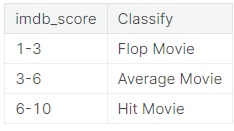

In [30]:
# IMDb 평점에 따라 영화를 분류
def classify_movie(score):
    if score < 3:
        return "Flop Movie"
    elif score >= 3 and score < 6:
        return "Average Movie"
    else:
        return "Hit Movie"

# "Classify" 열을 생성하여 영화를 분류
title_ratings['score'] = title_ratings['averageRating'].apply(classify_movie)

# 결과를 확인
title_ratings

,tconst,averageRating,numVotes,score
0,tt0000001,5.7,2002,Average Movie
1,tt0000002,5.8,269,Average Movie
2,tt0000003,6.5,1893,Hit Movie
3,tt0000004,5.5,178,Average Movie
4,tt0000005,6.2,2678,Hit Movie
...,...,...,...,...
1360163,tt9916730,7.6,11,Hit Movie
1360164,tt9916766,7.0,22,Hit Movie
1360165,tt9916778,7.2,36,Hit Movie
1360166,tt9916840,8.8,6,Hit Movie


# 데이터 합치기 (for only Movies and TV Movies)

In [31]:
movies = pd.merge(pd.merge(pd.merge(pd.merge(title_basics, title_crew, on="tconst"), 
                                                           title_crew, on = "tconst"),
                                                           title_principals, on="tconst"), 
                                                           title_ratings, on ="tconst")
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genres_num,genres_first,...,directors_count_y,writers_count_y,actor,actress,crew_total,first_actor,first_actress,averageRating,numVotes,score
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,1,Romance,...,1,1,2,1,4,0183823,0063086,5.3,207,Average Movie
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",3,Documentary,...,1,1,0,0,7,,,5.3,483,Average Movie
2,tt0000502,movie,Bohemios,Bohemios,0,1905,100,\N,1,\N,...,1,3,2,0,5,0215752,,4.1,15,Average Movie
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",3,Action,...,1,1,3,1,10,0846894,0846887,6.0,853,Hit Movie
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama,1,Drama,...,1,1,2,2,5,0906197,1323543,5.0,21,Average Movie


In [32]:
movies.shape

(349218, 27)

In [33]:
movies = movies.drop(['primaryTitle','originalTitle','first_director_y', 'first_writer_y', 'directors_count_y', 'writers_count_y'], axis=1)

In [34]:
movies = movies.rename(columns={'first_director_x': 'first_director', 'first_writer_x': 'first_writer', 'directors_count_x': 'directors_count', 'writers_count_x' : 'writers_count'})
movies = movies.rename(columns={'actor': 'actor_count', 'actress': 'actress_count'})

In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349218 entries, 0 to 349217
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tconst                349218 non-null  object 
 1   titleType             349218 non-null  object 
 2   isAdult               349218 non-null  object 
 3   startYear             349218 non-null  object 
 4   runtimeMinutes        349218 non-null  object 
 5   genres                349218 non-null  object 
 6   genres_num            349218 non-null  int64  
 7   genres_first          349218 non-null  object 
 8   genres_first_encoded  349218 non-null  int64  
 9   first_director        349218 non-null  object 
 10  first_writer          349218 non-null  object 
 11  directors_count       349218 non-null  int64  
 12  writers_count         349218 non-null  int64  
 13  actor_count           349218 non-null  int64  
 14  actress_count         349218 non-null  int64  
 15  

In [36]:
movies

,tconst,titleType,isAdult,startYear,runtimeMinutes,genres,genres_num,genres_first,genres_first_encoded,first_director,...,directors_count,writers_count,actor_count,actress_count,crew_total,first_actor,first_actress,averageRating,numVotes,score
0,tt0000009,movie,0,1894,45,Romance,1,Romance,0,0085156,...,1,1,2,1,4,0183823,0063086,5.3,207,Average Movie
1,tt0000147,movie,0,1897,100,"Documentary,News,Sport",3,Documentary,1,0714557,...,1,1,0,0,7,,,5.3,483,Average Movie
2,tt0000502,movie,0,1905,100,\N,1,\N,2,0063413,...,1,3,2,0,5,0215752,,4.1,15,Average Movie
3,tt0000574,movie,0,1906,70,"Action,Adventure,Biography",3,Action,3,0846879,...,1,1,3,1,10,0846894,0846887,6.0,853,Hit Movie
4,tt0000591,movie,0,1907,90,Drama,1,Drama,4,0141150,...,1,1,2,2,5,0906197,1323543,5.0,21,Average Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349213,tt9916362,movie,0,2020,92,"Drama,History",2,Drama,4,1893148,...,1,2,2,2,10,0107165,3766704,6.4,5571,Hit Movie
349214,tt9916428,movie,0,2019,\N,"Adventure,History,War",3,Adventure,5,0910951,...,1,1,5,1,7,3611859,0422639,3.5,17,Average Movie
349215,tt9916460,tvMovie,0,2019,\N,Comedy,1,Comedy,6,7048843,...,1,2,3,1,6,8796794,10538444,9.4,18,Hit Movie
349216,tt9916538,movie,0,2019,123,Drama,1,Drama,4,4457074,...,1,3,1,3,10,10041459,8678236,8.6,7,Hit Movie


In [37]:
movies.describe()

,genres_num,genres_first_encoded,directors_count,writers_count,actor_count,actress_count,crew_total,averageRating,numVotes
count,349218.000000,349218.000000,349218.000000,349218.000000,349218.000000,349218.000000,349218.000000,349218.000000,3.492180e+05
mean,1.700350,5.458195,1.131995,1.785999,2.293375,1.402542,8.926175,6.241648,3.130688e+03
std,0.806271,4.381882,0.764139,1.241673,1.491656,1.152649,2.016553,1.373404,3.301075e+04
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000e+00
25%,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,9.000000,5.400000,1.800000e+01
50%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,10.000000,6.300000,5.500000e+01
75%,2.000000,6.000000,1.000000,2.000000,3.000000,2.000000,10.000000,7.200000,2.730000e+02
max,3.000000,27.000000,86.000000,69.000000,10.000000,10.000000,10.000000,10.000000,2.809141e+06


In [38]:
movies.to_csv("movies.csv", index=False)

In [39]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349218 entries, 0 to 349217
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tconst                349218 non-null  object 
 1   titleType             349218 non-null  object 
 2   isAdult               349218 non-null  object 
 3   startYear             349218 non-null  object 
 4   runtimeMinutes        349218 non-null  object 
 5   genres                349218 non-null  object 
 6   genres_num            349218 non-null  int64  
 7   genres_first          349218 non-null  object 
 8   genres_first_encoded  349218 non-null  int64  
 9   first_director        349218 non-null  object 
 10  first_writer          349218 non-null  object 
 11  directors_count       349218 non-null  int64  
 12  writers_count         349218 non-null  int64  
 13  actor_count           349218 non-null  int64  
 14  actress_count         349218 non-null  int64  
 15  

In [40]:
movies

,tconst,titleType,isAdult,startYear,runtimeMinutes,genres,genres_num,genres_first,genres_first_encoded,first_director,...,directors_count,writers_count,actor_count,actress_count,crew_total,first_actor,first_actress,averageRating,numVotes,score
0,tt0000009,movie,0,1894,45,Romance,1,Romance,0,0085156,...,1,1,2,1,4,0183823,0063086,5.3,207,Average Movie
1,tt0000147,movie,0,1897,100,"Documentary,News,Sport",3,Documentary,1,0714557,...,1,1,0,0,7,,,5.3,483,Average Movie
2,tt0000502,movie,0,1905,100,\N,1,\N,2,0063413,...,1,3,2,0,5,0215752,,4.1,15,Average Movie
3,tt0000574,movie,0,1906,70,"Action,Adventure,Biography",3,Action,3,0846879,...,1,1,3,1,10,0846894,0846887,6.0,853,Hit Movie
4,tt0000591,movie,0,1907,90,Drama,1,Drama,4,0141150,...,1,1,2,2,5,0906197,1323543,5.0,21,Average Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349213,tt9916362,movie,0,2020,92,"Drama,History",2,Drama,4,1893148,...,1,2,2,2,10,0107165,3766704,6.4,5571,Hit Movie
349214,tt9916428,movie,0,2019,\N,"Adventure,History,War",3,Adventure,5,0910951,...,1,1,5,1,7,3611859,0422639,3.5,17,Average Movie
349215,tt9916460,tvMovie,0,2019,\N,Comedy,1,Comedy,6,7048843,...,1,2,3,1,6,8796794,10538444,9.4,18,Hit Movie
349216,tt9916538,movie,0,2019,123,Drama,1,Drama,4,4457074,...,1,3,1,3,10,10041459,8678236,8.6,7,Hit Movie
